## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('..\data\Sleep_health_and_lifestyle_dataset.csv')

#### Show Top 5 Records

In [4]:
df.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,systolic,diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


#### Preparing X and Y variables

In [6]:
X = df.drop(columns=['Sleep_Disorder'],axis=1)


In [7]:
X.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,systolic,diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90


In [9]:
y = df['Sleep_Disorder'].fillna("None")

In [24]:
y.head(10)

0           None
1           None
2           None
3    Sleep Apnea
4    Sleep Apnea
5       Insomnia
6       Insomnia
7           None
8           None
9           None
Name: Sleep_Disorder, dtype: object

In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(374, 26)

In [14]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
encoded_labels = label_encoder.fit_transform(y)

In [20]:
encoded_labels

array([1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,

In [50]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,encoded_labels,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((299, 49), (75, 49))

#### Create an Evaluate Function to give all metrics after model Training

In [51]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [60]:
models = {
    "Ada-Boost Classifier": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False)
}
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Print evaluation metrics
    print(model_name)
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1 Score: {:.4f}".format(f1))
    print('='*35)
    print('\n')
    
    # Append metrics to lists
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

b:\Projects\ML_endtoend\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada-Boost Classifier
- Accuracy: 0.7200
- Precision: 0.7270
- Recall: 0.7200
- F1 Score: 0.7197


K-Nearest Neighbors
- Accuracy: 0.8800
- Precision: 0.8819
- Recall: 0.8800
- F1 Score: 0.8785


Decision Tree
- Accuracy: 0.8800
- Precision: 0.8819
- Recall: 0.8800
- F1 Score: 0.8785


Random Forest
- Accuracy: 0.8800
- Precision: 0.8788
- Recall: 0.8800
- F1 Score: 0.8772


XGBoost
- Accuracy: 0.8933
- Precision: 0.8933
- Recall: 0.8933
- F1 Score: 0.8923


CatBoost
- Accuracy: 0.8800
- Precision: 0.8773
- Recall: 0.8800
- F1 Score: 0.8763




### Results

In [64]:
# Assuming accuracy_list contains accuracy scores for classification models
accuracy_df = pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"], ascending=False)

print(accuracy_df)

             Model Name  Accuracy
4               XGBoost  0.893333
1   K-Nearest Neighbors  0.880000
2         Decision Tree  0.880000
3         Random Forest  0.880000
5              CatBoost  0.880000
0  Ada-Boost Classifier  0.720000


## Linear Regression

In [66]:
XGBoost = XGBClassifier()
XGBmodel = XGBoost.fit(X_train, y_train)
y_pred = XGBmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %accuracy)

 Accuracy of the model is 89.33


## Plot y_pred and y_test

#### Difference between Actual and Predicted Values

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


Accuracy of the model is 89.33


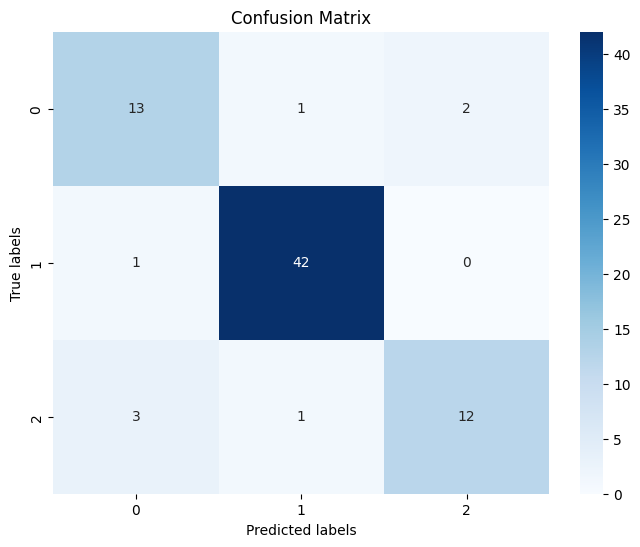

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score


# Assuming you have trained and made predictions with XGBmodel as shown in the previous code

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model is %.2f" % (accuracy * 100))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            )
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()